# Training of Super resolution architecture

For the Super-resolution notebook see [SuperResolution.ipynb]

This notebook used to train the network on the Colab. To train the model for a single layer $i$ run the following script:
```bash
!python trainMe.py -l i -n 300 -lr 0.05 -bs 263
```
example for training the layer 2 is listed below. First download the proper files.

In [ ]:
import sys, urllib.request
from google.colab import files
!mkdir -pv data images models
!pip install uproot
!pip install gputil
urllib.request.urlretrieve('https://cernbox.cern.ch/index.php/s/GRAyoFxBHAlMVpu/download',
                               'data/events_6D64x64.root')
urllib.request.urlretrieve('https://cernbox.cern.ch/index.php/s/dZ9r1nvBRTpJMNW/download',
                               'data/events_6D64x64_ATLAS_resolution_6D64x64.root')
urllib.request.urlretrieve('https://cernbox.cern.ch/index.php/s/dEZGYJgXOjV2ArN/download',
                               'data/events_6D64x64_ATLAS_resolution.root')
!wget https://raw.githubusercontent.com/michael-pitt/AI/master/ParticleImages/train_helpers.py
!wget https://raw.githubusercontent.com/michael-pitt/AI/master/ParticleImages/trainMe.py
!wget https://raw.githubusercontent.com/michael-pitt/AI/master/ParticleImages/particleImages_helpers.py
!wget https://raw.githubusercontent.com/michael-pitt/AI/master/ParticleImages/models/NewConv2d.py  -o models/NewConv2d.py
!wget https://raw.githubusercontent.com/michael-pitt/AI/master/ParticleImages/models/data_loader.py  -o models/data_loader.py
!wget https://raw.githubusercontent.com/michael-pitt/AI/master/ParticleImages/models/__init__.py  -o models/__init__.py
print('Using COLAB: all additional packages are installed and the data is downloaded')

In [ ]:
i=2
!python trainMe.py -l 2 -n 300 -lr 0.05 -bs 263

In [ ]:
files.download('models/UNET_SR_dipion_dict_L%d.pt'%i)  

### Loading the data
Here we will load the saved trained network and plot the loss

In [7]:
import uproot, torch
from train_helpers import SRDataLoaderLayers
from models import NewConv2d
from particleImages_helpers import DrawEventSR
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader

In [9]:
treeHR = uproot.open('data/events_6D64x64.root')['EventTree']
treeLR = uproot.open('data/events_6D64x64_ATLAS_resolution.root')['EventTree']
train_dataset = SRDataLoaderLayers(treeLR, treeHR)
LR_shapes, HR_shape = NewConv2d.ReadShapes(train_dataset)
model = NewConv2d.model(LR_shapes, HR_shape, 2)
optimizer = optim.Adam(model.parameters(), lr = 0.5)
checkpoint = torch.load('models/UNET_SR_dipion_dict_L2.pt')
model.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer'])
cacheSR = checkpoint['cache']
model.train()
print('model loaded')

model loaded


### Calorimeter images

Draw the training results

(1, 64, 64)


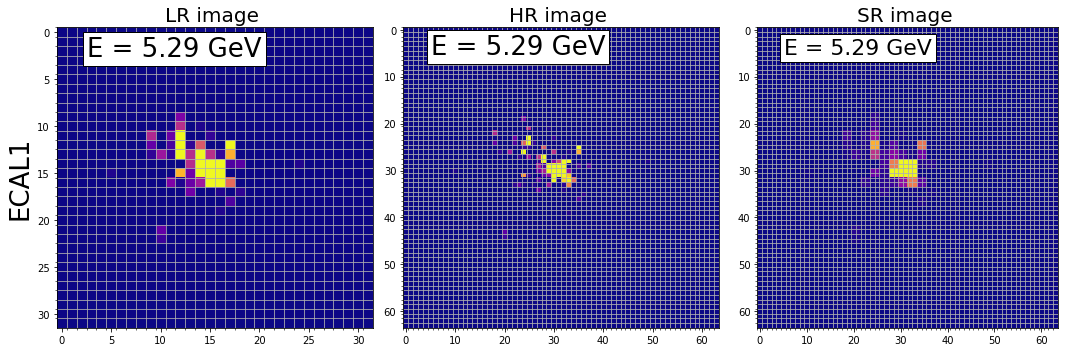

In [52]:
DrawEventSR(train_dataset,123, layer=2, model = model)

## continue training the model

In [56]:
def criterion(yhat, y):
    return  torch.mean( (yhat - y[:,opt.Layer_i,:,:]).pow(2) ) 
device = torch.device("cuda:"+str(0) if torch.cuda.is_available() else "cpu")
train_loader=DataLoader(dataset=train_dataset,batch_size=512 ) #train_size

In [57]:
cacheSR = trainMe(train_loader, model, optimizer, criterion, 2, cacheSR, device)
plt.plot(cacheSR['loss'])
plt.show()

'images/SR_yhat_'

len of cache is =  0
progress |##################################################| 100.0% loss - 8644.53515625
total time: 360.66 sec


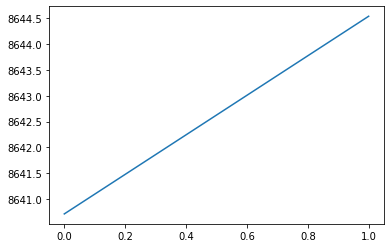

In [17]:
# training the model
cacheSR = trainMe(train_loader, model, optimizer, criterion, 2, cacheSR, device)

#saving the model
torch.save({
        'model_state_dict' : model.cpu().state_dict(),
        'cache' : cacheSR,
        'optimizer': optimizer.state_dict(),
        },
        outname)

plt.plot(cacheSR['loss'])
plt.show()

In [ ]:
#on colab, download the generated sample
files.download('models/UNET_SR_dipion_dict_v1.pt')  

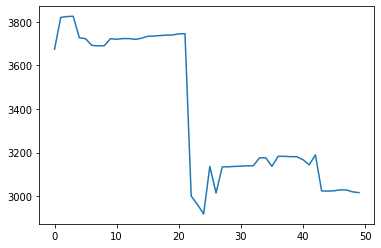

In [68]:
plt.plot(cacheSR['loss'])
plt.show()

In [ ]:
#saving the model
torch.save({
        'model_state_dict' : model.cpu().state_dict(),
        'cache' : cacheSR,
        'optimizer': optimizer.state_dict(),
        },
        'models/UNET_SR_dipion_dict_v1.pt')

### Continue training the model

with different learning rate